In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("/content/medical_insurance_10000.csv")


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,male,33.0,3,no,northwest,8607.38
1,46,male,34.2,0,no,southeast,8045.09
2,32,female,32.0,4,yes,southeast,24195.25
3,60,female,35.5,1,no,northeast,8291.31
4,25,female,27.1,4,no,southeast,6363.12


In [10]:
df['sex']=df['sex'].replace({
    "male":0,
    "female":1
})

/tmp/ipython-input-3358243679.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({


In [11]:
df['sex'].head()

,sex
0,0
1,0
2,1
3,1
4,1


In [12]:
df['smoker']=df['smoker'].replace({
    "yes":1,
    "no":0
})

/tmp/ipython-input-1974442686.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker']=df['smoker'].replace({


In [14]:
df["region"]=df["region"].replace({
    "southwest":1,
    "southeast":2,
    "northwest":3,
    "northeast":4
})

/tmp/ipython-input-3745252615.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["region"]=df["region"].replace({


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,0,33.0,3,0,3,8607.38
1,46,0,34.2,0,0,2,8045.09
2,32,1,32.0,4,1,2,24195.25
3,60,1,35.5,1,0,4,8291.31
4,25,1,27.1,4,0,2,6363.12


In [17]:

X= df.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,56,0,33.0,3,0,3
1,46,0,34.2,0,0,2
2,32,1,32.0,4,1,2
3,60,1,35.5,1,0,4
4,25,1,27.1,4,0,2
...,...,...,...,...,...,...
9995,33,0,31.8,1,0,1
9996,29,0,31.0,4,0,2
9997,18,1,28.9,2,0,3
9998,25,1,28.7,4,0,4


In [18]:
y=df.iloc[:,-1]

In [19]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
reg=LinearRegression()

In [21]:
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=reg.predict(X_test)

In [24]:
accuracy=r2_score(y_test,y_pred)
accuracy

0.9753128301426389

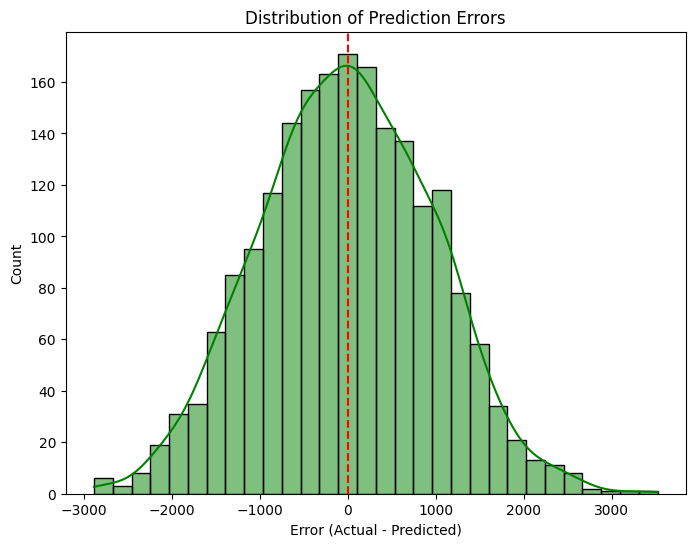

In [28]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='green')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Error (Actual - Predicted)')
plt.title('Distribution of Prediction Errors')
plt.show()